In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
performance = pd.read_csv("students.csv")
performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,sex,education,meal,exam,race
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,1,0,1
1,female,group C,some college,standard,completed,69,90,88,0,4,1,1,2
2,female,group B,master's degree,standard,none,90,95,93,0,3,1,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,0,0
4,male,group C,some college,standard,none,76,78,75,1,4,1,0,2


In [2]:
y = performance[['writing score']]

In [3]:
x = performance[['education']]

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 1234)

In [5]:
x_train.shape, x_test.shape

((800, 1), (200, 1))

In [6]:
x_train.head()

,education
281,2
42,0
255,4
906,2
394,5


In [7]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 1234)

In [8]:
model = classifier.fit(x_train, y_train)

In [9]:
model.score(x_test, y_test)

0.015

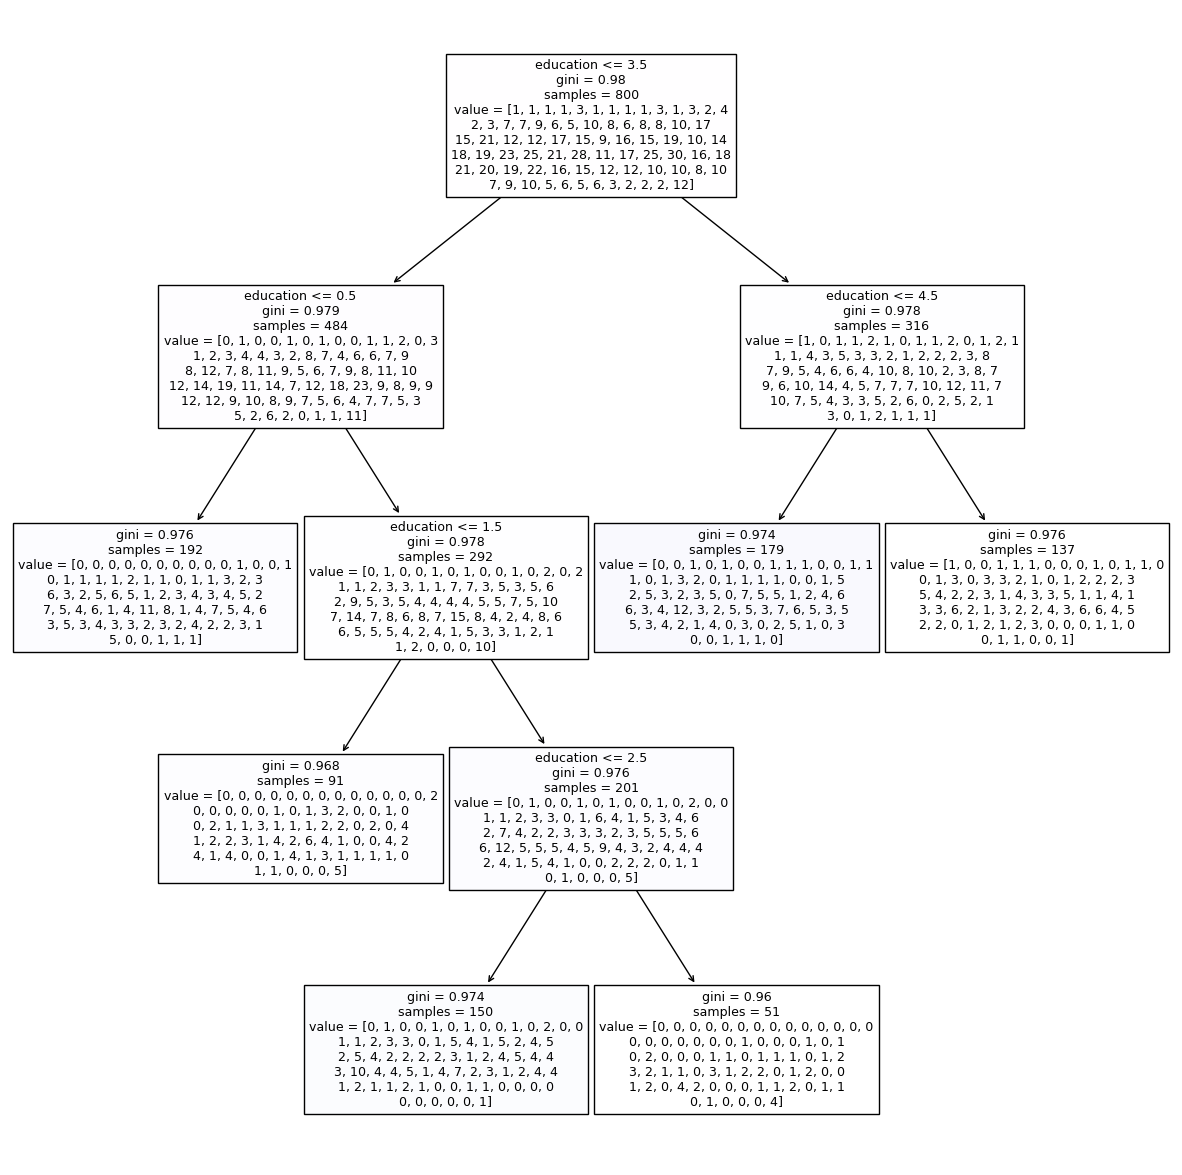

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
tree.plot_tree(model, feature_names = list(x_train.columns),
filled = True);

In [11]:
model.score(x_train, y_train)

0.06125

In [12]:
grid = {'max_depth': [2, 3, 4, 5],
       'min_samples_split': [2, 3, 4],
       'min_samples_leaf': [1, 2, 3, 4, 5, 6]}

In [13]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state = 1234)
gcv = GridSearchCV(estimator = classifier, param_grid = grid)
gcv.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]})

In [14]:
model_ = gcv.best_estimator_
model_.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [15]:
model_.score(x_train, y_train)

0.05875

In [16]:
model_.score(x_test, y_test)

0.015

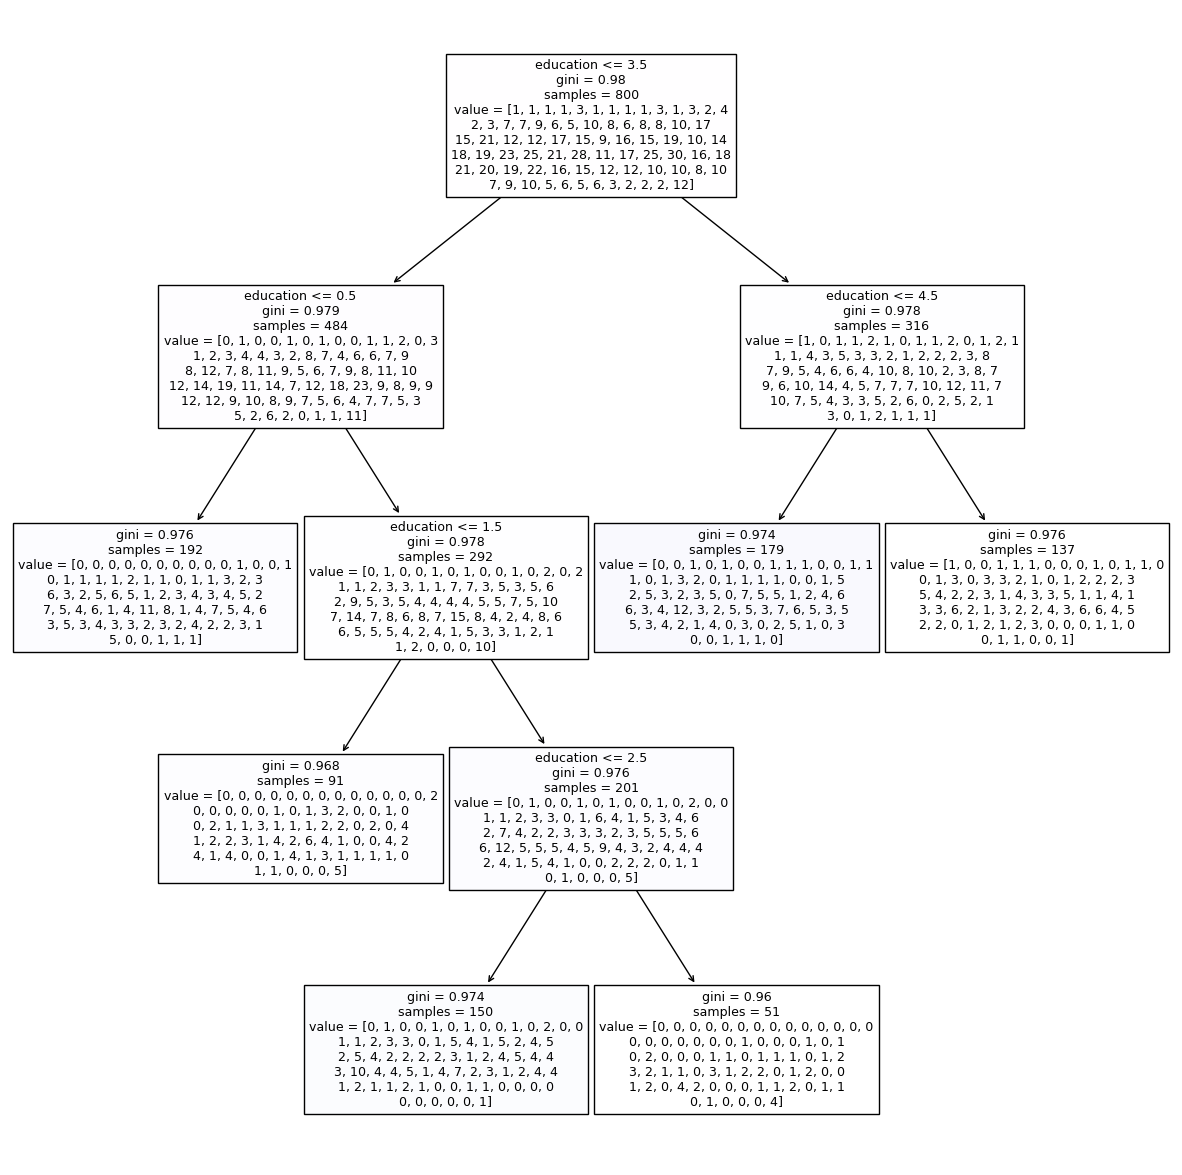

In [17]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
tree.plot_tree(model, feature_names = list(x_train.columns),
filled = True);